<center><img alt="" src="images/0_Cover.jpg"/></center> 

## <center><font color="blue">Unsupervised Learning - Clustering</font></center>

<h2 id="(C)-Taufik-Sutanto---2019" style="text-align: center;">(C) Taufik Sutanto - 2019</h2>
<h2 id="tau-data-Indonesia-~-https://tau-data.id" style="text-align: center;">tau-data Indonesia ~ <a href="https://tau-data.id" target="_blank"><span style="color: #0009ff;">https://tau-data.id</span></a></h2>

# Notes and Disclaimer

* This notebook is part of the free (open knowledge) eLearning course at: https://tau-data.id/courses/
* Some images are taken from several resources, we respect those images ownerships and put a reference/citation from where it is originated. Nevertheless, sometimes we are having trouble to find the origin of the image(s). If you are the owner of the image and would like the image taken-out (or want the citation to be revised) from this open knowledge course resources please contact us here with the details: https://tau-data.id/contact/  
* Unless stated otherwise, in general tau-data permit its resources to be copied and-or modified for non-commercial purposes. With condition proper acknowledgement/citation is given.

## Outline:

* Pendahuluan Clustering
* Centroid-Based Clustering: k-Means, k-Means++, Minibatch k-means
* Evaluasi Centroid-based clusetering: MSE dan Silhouette Coefficient
* Optimal Clusters?
* Visualisasi dan Interpretasi Centroid Based Clustering
* Density Based Clustering dan Multivariate outlier Detection (DBSCAN)
* Visualisasi dan Evaluasi Density Based Clustering
* Pendahuluan Hierarchical Clustering
* Hierarchical Links
* Spectral CLustering 

In [1]:
# Importing Modules untuk Notebook ini
import time, umap, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
sns.set(style="ticks", color_codes=True)
from matplotlib.colors import ListedColormap
from sklearn import cluster, datasets
from tqdm import tqdm_notebook as tqdm
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from sklearn.metrics import silhouette_score as siluet
from sklearn.metrics.cluster import homogeneity_score as purity
from sklearn.metrics import normalized_mutual_info_score as NMI
import tau_unsup as tau
import warnings; warnings.simplefilter('ignore')
random_state = 170

## pip install umap-learn
* Modul ini dibutuhkan untuk dimensional reduction ala t-SNE
* Jika di terminal ketikkan perintah **pip install umap-learn**
* Jika di Google Colab tambahkan satu baris di atas cell sebelumnya: **!pip install umap-learn**

<p><img alt="" src="images/clustering_Quotes.png" style="width: 800px; height: 118px;" /></p>


# Clustering?

<p><img alt="" src="images/5_what_is_clustering.png" style="height:457px; width:864px" /></p>

## Definition

Clustering is as a process of finding group structures within data such that each instance within a group is similar to one another and dissimilar to instances in other groups [1]

[1]. Jain, A.K., Data clustering: 50 years beyond K-means. Pattern Recognition Letters, 2010. 31(8): p. 651-666.

## Applications

Clustering analysis applications can be divided into two broad categories, clustering for utility (e.g., data compression and indexing) and clustering for understanding data (e.g., finding latent structures or insights in the data) [2]. Methods developed in this subject (Data Mining) fall into the second category.

[2]. Pang-Ning, T., M. Steinbach, and V. Kumar, Introduction to data mining. Vol. 74. 2006, Boston, MA, USA: Addison-Wesley Longman Publishing Co., Inc.

## Realworld Clustering Applications

* Recommendation engines
* Market segmentation
* Social network analysis
* Search result grouping
* Medical imaging
* Image segmentation
* Anomaly detection

<p><img alt="" src="images/56_Supervised VS unsupervised.png" style="height:500px; width:1153px" /></p>

<p><img alt="" src="images/5_Clus-Clas.png" style="height:500px; width:766px" /></p>

<p><img alt="" src="images/5_types_of_clustering.png" style="height:500px; width:719px" /></p>

# Tantangan Clustering

* Computational Complexity
* Evaluation
* Interpretation
* Heavily depends on domain knowledge

In [2]:
# Kita akan menggunakan 2 data: [1]. Iris dan [2]. Data untuk Studi Kasus (segmentasi kustomer) - di bagian akhir kuliah
# load the iris data
df = pd.read_excel('data/iris.xls', sheet_name='Sheet1')# Load "sheet_1" di Excell
X = df[['SEPALLEN','SEPALWID','PETALLEN','PETALWID']].values
C = df['SPECIES'].values
print(type(X), type(C))
X.shape

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(150, 4)

<h3>Metode Clustering yang akan kita bahas:</h3>

<ol>
	<li>k-Means</li>
	<li>k-Means++</li>
	<li>Mini-Batch k-Means</li>
    <li>Hierarchical Clustering</li>
    <li>DBSCAN</li>
	<li>Spectral</li>
</ol>


<h2>k-Means</h2>

<p><img alt="" src="images/5_Kmeans_animation.gif" style="height:300px; width:300px" /></p>


<p><img alt="" src="images/5_kmeans_Algorithm.png" style="height:229px; width:430px" /></p>

## How it works

* Numerically
* Visually: https://www.learndatasci.com/tutorials/k-means-clustering-algorithms-python-intro/ 

<ul>
	<li>
	<h3>Apakah pengaruh menggunakan centroid dan algoritma ini terhadap hasil cluster?</h3>
	</li>
	<li>
	<h3>k-Means tidak Robust terhadap outlier, Why? ==&gt; lalu apa yang sebaiknya dilakukan?</h3>
	</li>
</ul>

In [3]:
# k-means: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

k = 3
km = cluster.KMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
km.fit(X)
'Done'

'Done'

In [4]:
# Hasil clusteringnya
C_km = km.predict(X)
C_km
# Apa beda label ini dengan klasifikasi ("labels")?

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

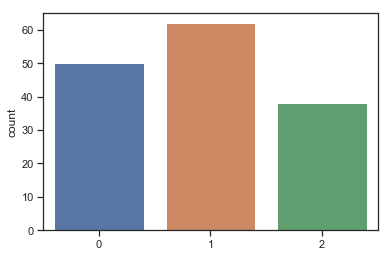

In [31]:
import seaborn as sns
sns.countplot(C_km)

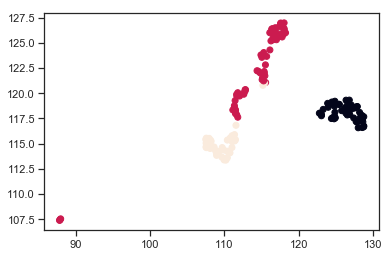

In [32]:
X2D = umap.UMAP(n_neighbors=5, min_dist=0.3).fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_km)
plt.show()

## Does imbalance data matters?



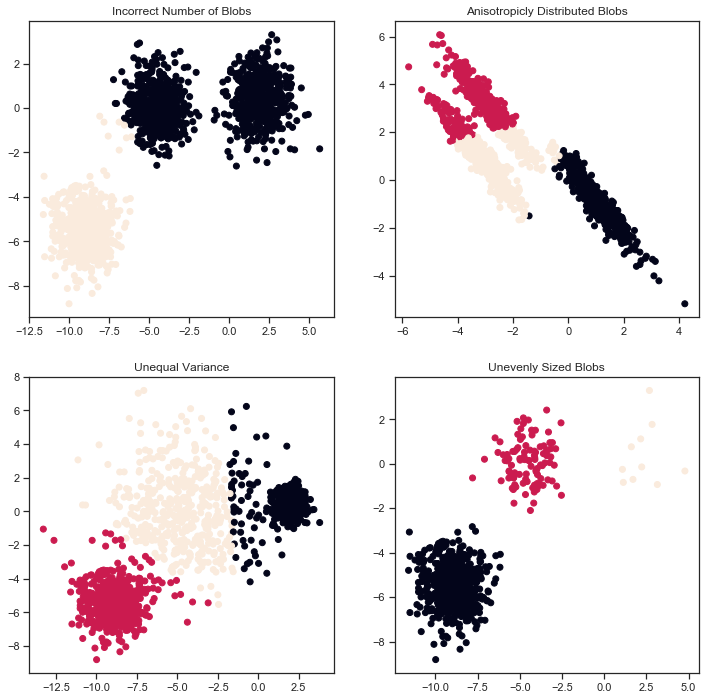

In [7]:
TS.km_assumptions()

<h3 id="k-Means++">k-Means++</h3>

<p>Original <em>k-means</em> memulai algoritmanya dengan mengacak centroid awal dan k-means tidak &quot;robust&quot; terhadap centroid awal ini (apa artinya?).</p>

<p>&nbsp;</p>

<p><strong>k-Means akan menghasilkan hasil yang berbeda-beda jika di-run beberapa kali!....</strong></p>

<p>k-Means++ &quot;mengatasi&quot; hal ini:</p>

<p>inisialisasi centroid tidak random, tapi dengan menghitung probabilitas terbaik bagi centroid awal.</p>

<p>Keuntungan selain lebih robust, biasanya iterasi yang dibutuhkan jauh lebih sedikit ketimbang k-means++</p>

<p>Reference :&nbsp;<a href="http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf" target="_blank">http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf</a>&nbsp;</p>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

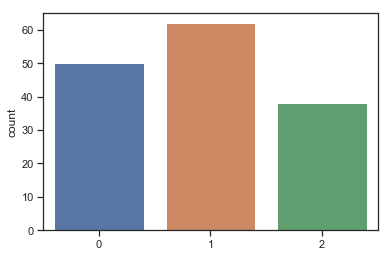

In [8]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, n_jobs=-1, random_state = random_state)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(C_kmpp)
C_kmpp[:10]

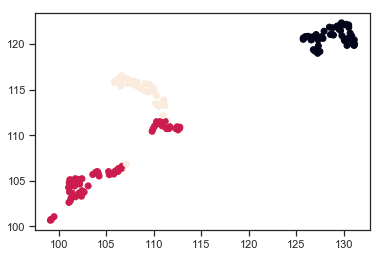

In [9]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_kmpp)
plt.show()

<h3>Mini-Batch k-Means:</h3>

<p><img alt="" src="images/5_minibatch.JPG" style="height:350px; width:458px" /></p>

<p>&nbsp;</p>

<p><strong>Referensi</strong>: *Sculley, D. (2010, April). Web-scale k-means clustering. In&nbsp;<em>Proceedings of the 19th international conference on World wide web</em>&nbsp;(pp. 1177-1178). ACM.</p>

<p>* Google</p>


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

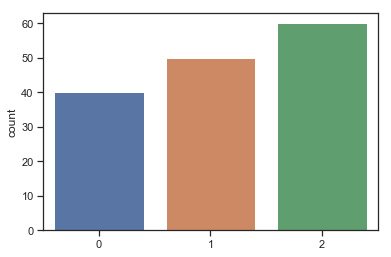

In [10]:
# MiniBatch k-Means 
# http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
# minibatch "tidak bisa parallel"!!!...
# parameter penting km = batch_size ... pada aplikasi sesungguhnya disarankan "minimal" 3xk
mbkm = cluster.MiniBatchKMeans(n_clusters=k, init='random', max_iter=300, tol=0.0001, random_state = random_state) 
mbkm.fit(X)
C_mbkm = mbkm.predict(X)
sns.countplot(C_mbkm)
C_mbkm[:10]

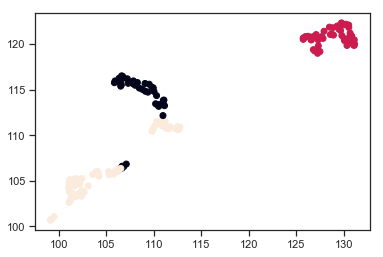

In [11]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkm)
plt.show()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

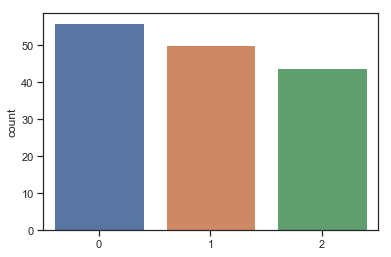

In [12]:
# MiniBatch k-Means++
mbkmPP = cluster.MiniBatchKMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state) 
mbkmPP.fit(X)
C_mbkmPP = mbkmPP.predict(X)
sns.countplot(C_mbkmPP)
C_mbkmPP[:10]

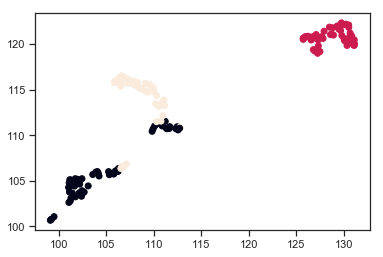

In [13]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_mbkmPP)
plt.show()

## k_means VS MiniBatch k-Means?

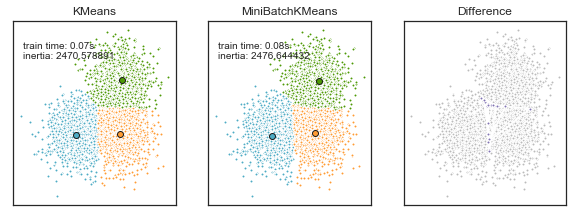

In [14]:
TS.km_vs_mbkm()

## Perbedaan Randomized VS k-Means++ - Initialization Matters

* n_init = Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
* inertia = Sum of squared distances of samples to their closest cluster center.

Evaluation of KMeans with k-means++ init
Evaluation of KMeans with random init
Evaluation of MiniBatchKMeans with k-means++ init
Evaluation of MiniBatchKMeans with random init


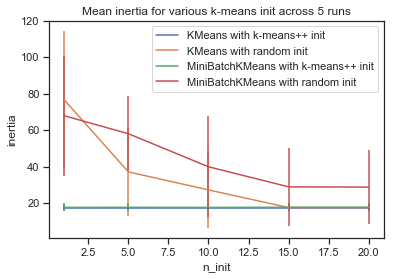

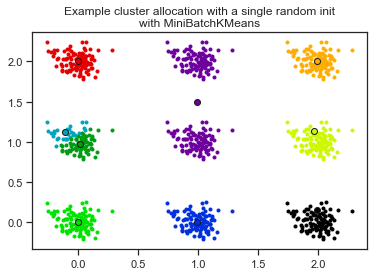

In [15]:
TS.km_initializations()

## Evaluasi dan interpretasi k-Means

<h2 id="Silhouette-Coefficient">Silhouette Coefficient</h2>

<img alt="" src="images/silhouette.png" style="width: 800px; height: 391px;" />

* Apa makna intuitifnya?

In [16]:
#Evaluasi : Internal . Contoh Silouette Coefficient ==> warning hanya cocok untuk k-means (centroid-based clustering)
Hasil_Clustering = [C_km, C_kmpp, C_mbkm, C_mbkmPP]
for res in Hasil_Clustering:
    print(siluet(X,res), end=', ')
# Bagaimana cara kerja dan interpretasinya?

0.5528190123564102, 0.5528190123564102, 0.5480079925941655, 0.5390671049271683, 

<p><strong>Evaluasi Clustering: Internal VS External</strong></p>

<p><img alt="" src="images/5_Clustering_evaluation.jpg" style="height:400px; width:533px" /></p>


In [17]:
# Bagaimana dengan evaluasi External?
# "C" adalah ground truth/golden standard
for res in Hasil_Clustering:
    print(purity(C,res), end=', ')

0.7514854021988338, 0.7514854021988338, 0.7232891816568932, 0.7371151150183064, 

In [18]:
# Evaluasi External NMI 

for res in Hasil_Clustering:
    print(NMI(C,res), end=', ')
# untuk F-Score ada juga code dan penjelasannya di blog post di atas

0.7582057278194196, 0.7582057278194196, 0.7277489401358583, 0.7387346063563004, 

## Please read more here:  https://tau-data.id/evaluasi-eksternal/

## Optimal Number of Clusters? - Elbow Method

Text(0.5,1,'Elbow curve')

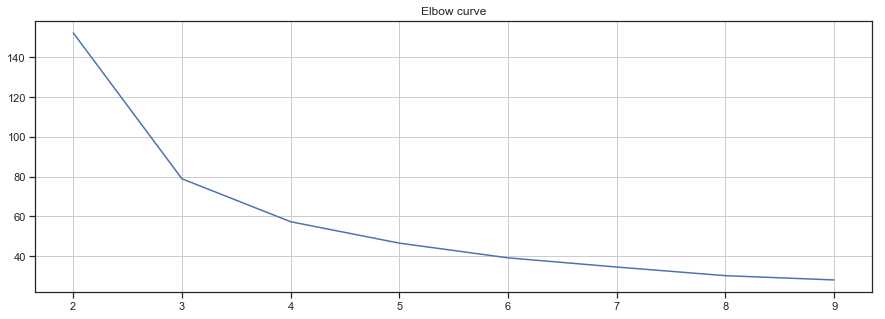

In [19]:
distorsions, k1, kN = [], 2, 10
for k in range(k1, kN):
    kmeans = cluster.KMeans(n_clusters=k).fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(k1, kN), distorsions); plt.grid(True)
plt.title('Elbow curve')

## Optimal Number of Cluster based on Silhouette Score

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


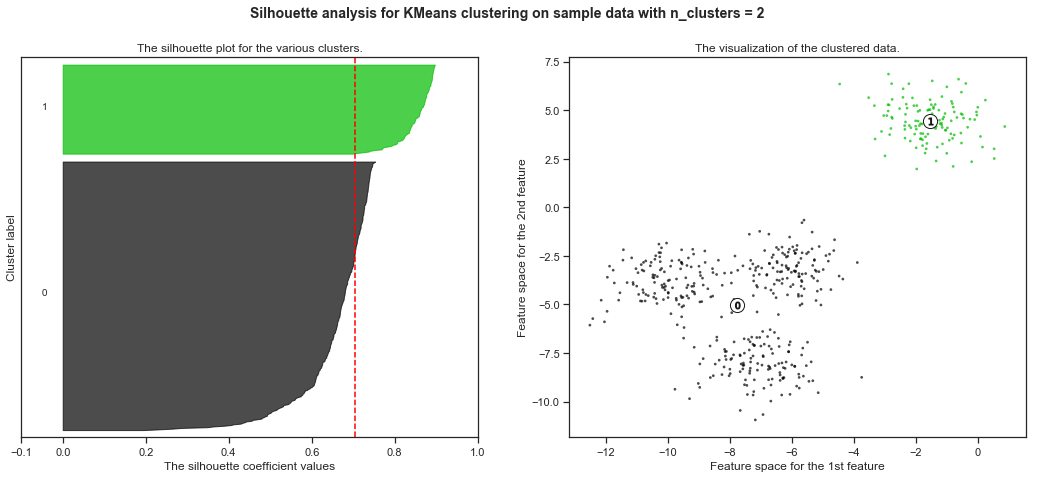

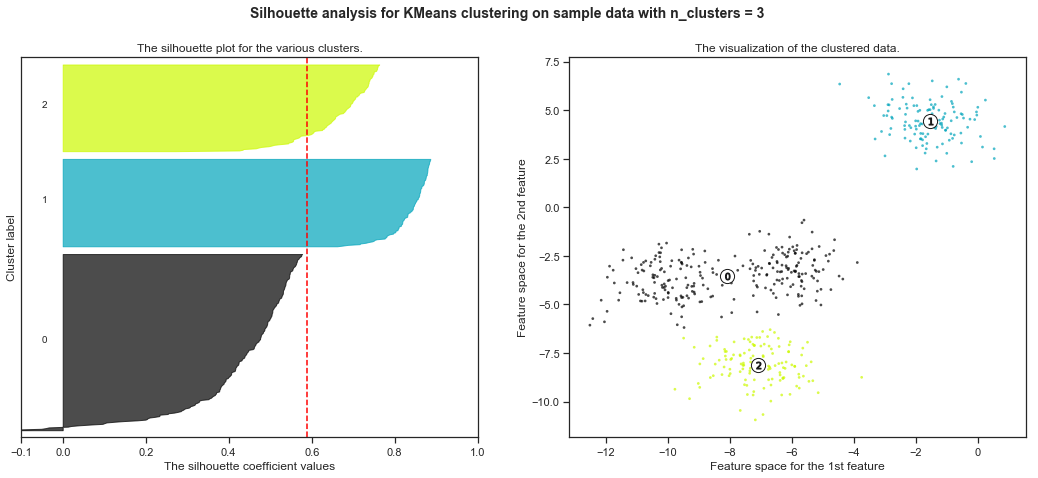

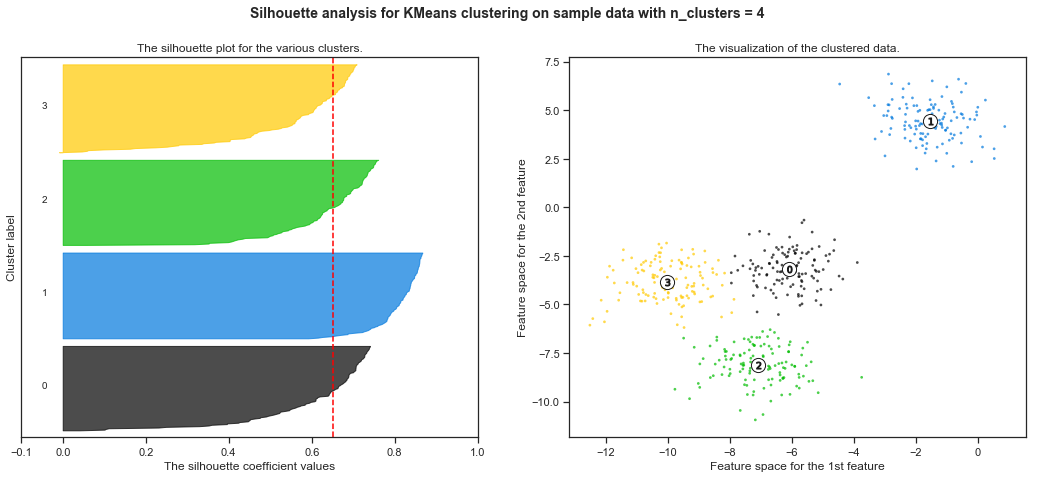

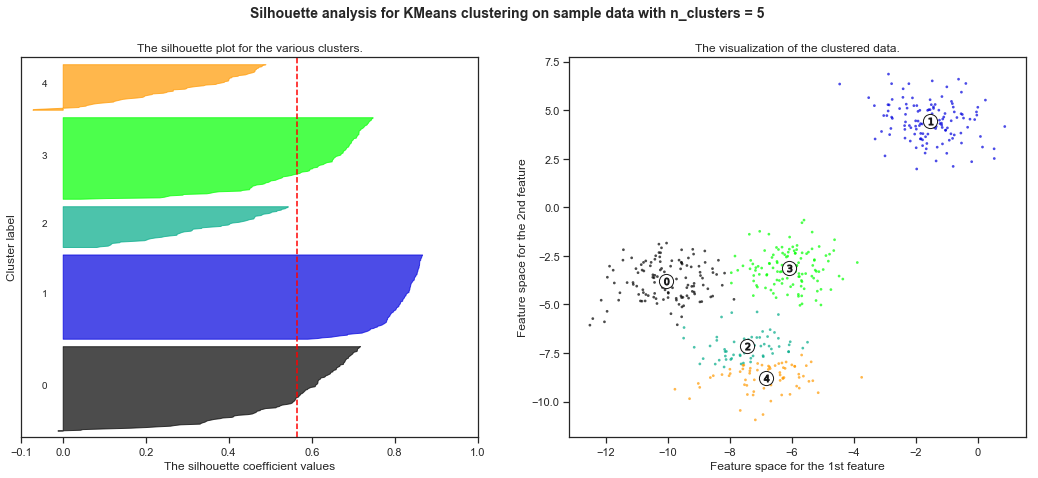

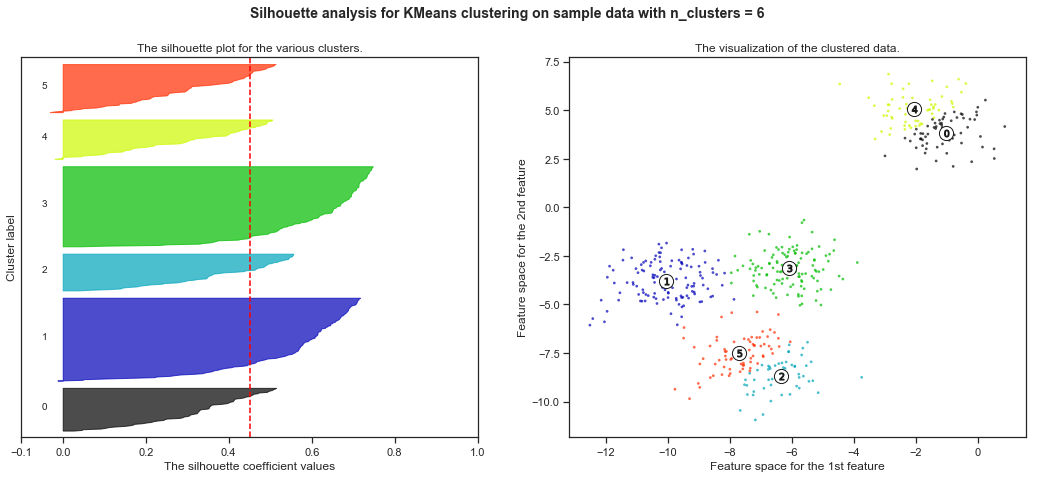

In [20]:
TS.sil_based_optimal_km()

# Interpretasi

In [21]:
# Evaluasi sebenarnya tidak terlalu penting di Unsupervised learning.
# inilah yang membedakan "clustering" dan "clustering Analysis"
# yang lebih penting adalah interpretasi, tapi Bagaimana?
# contoh k-means
centroids = kmPP.cluster_centers_
centroids # perhatikan ada k centroids, karena ada k cluster
print(centroids[0].shape)
centroids

(4,)


array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Best/Optimal Clustering?

### Catatan Penting dalam mengevaluasi Clustering secara internal:

* Tidak ada clustering yang "benar"
* Yang terpenting adalah interpretability/Informasi yang didapatkan (non-trivial information)
* Internal metric tertentu hanya cocok untuk suatu algoritma tertentu juga, sehingga di Penelitian/Aplikasi di dunia professional jangan membandingkan 2 macam clustering dengan ukuran internal yang spesifik untuk metode clustering tertentu (misal Silhouette untuk k-Means).
* Kleinberg, J. M. (2003). An impossibility theorem for clustering. In Advances in neural information processing systems (pp. 463-470).
* Referensi 1: http://papers.nips.cc/paper/2340-an-impossibility-theorem-for-clustering.pdf
* Referensi 2: https://core.ac.uk/download/pdf/34638775.pdf

## Hierarchical Clustering

<p><img alt="" src="images/5_hierarchical.gif" style="height:324px; width:720px" /></p>


<p><img alt="" src="images/5_linkages.png" style="height:500px; width:749px" /></p>


In [22]:
# Hierarchical http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
hierarchical = cluster.AgglomerativeClustering(n_clusters=3, linkage='average')
hierarchical.fit(X) # Lambat .... dan menggunakan banyak memori O(N^2 log(N))
C_h = hierarchical.labels_.astype(np.int)
C_h[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

<p><img alt="" src="images/5_Hierarchical_Text_Clustering_in_Genes_penyakit.jpg" style="height: 422px; width: 800px;" /></p>


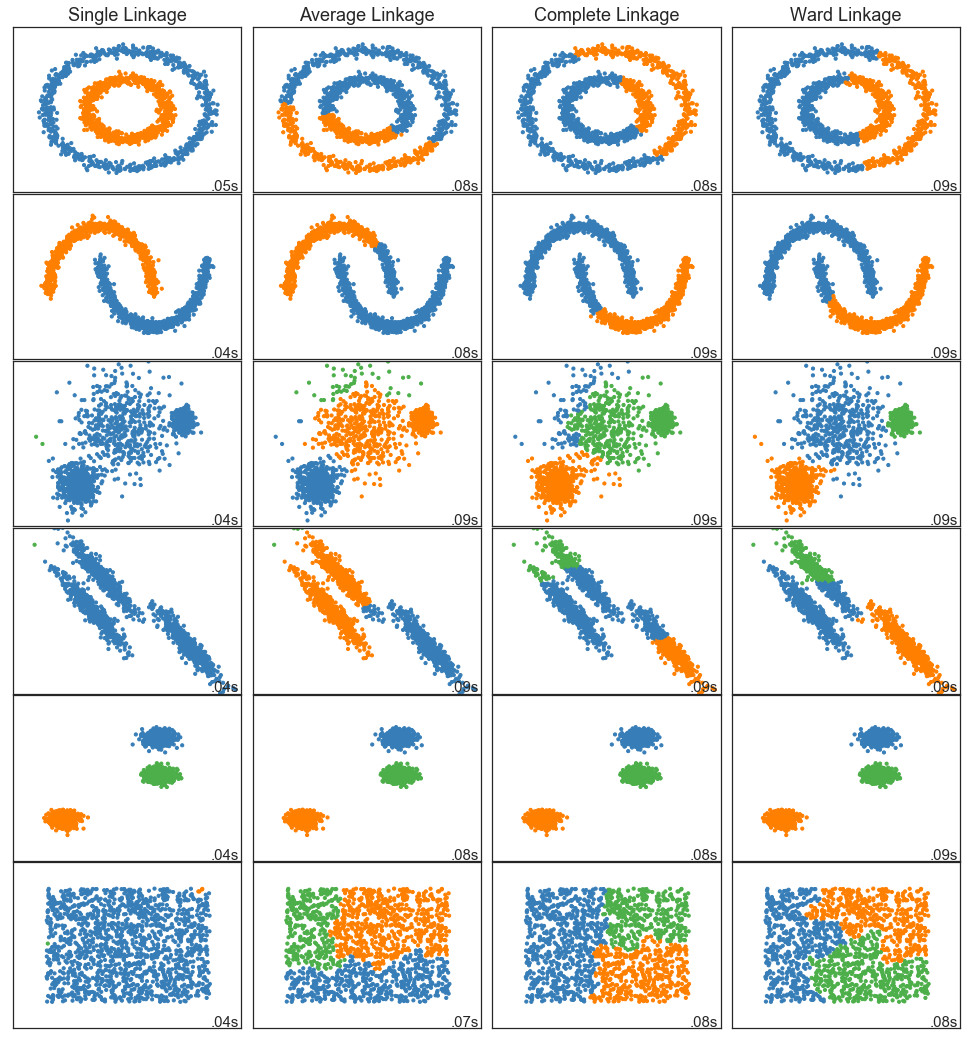

In [23]:
TS.compare_linkages()

## Linkages Comparisons

* single linkage is fast, and can perform well on non-globular data, but it performs poorly in the presence of noise.
* average and complete linkage perform well on cleanly separated globular clusters, but have mixed results otherwise.
* Ward is the most effective method for noisy data.
* http://scikit-learn.org/stable/auto_examples/cluster/plot_linkage_comparison.html#sphx-glr-auto-examples-cluster-plot-linkage-comparison-py

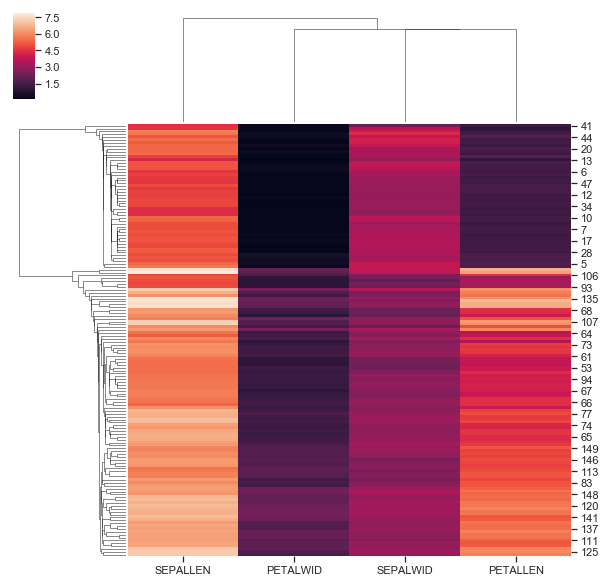

In [24]:
# Dendogram Example
# http://seaborn.pydata.org/generated/seaborn.clustermap.html
df.pop('SPECIES')
g = sns.clustermap(df, method="single", metric="euclidean")

# DBSCAN

<p><img alt="" src="images/5_DBSCAN.gif" style="height:360px; width:690px" /></p>

<p>Karena algoritma (cara kerjanya) ini maka DBSCAN sering digunakan untuk (multivariate) outlier detection.</p>


array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0])

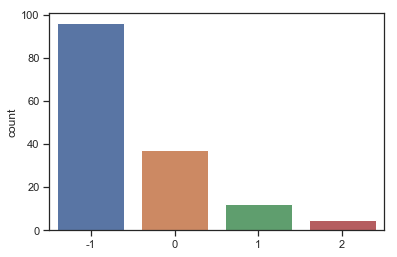

In [33]:
# DBSCAN http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
# tidak membutuhkan input parameter k!!!... sangat diperlukan untuk text Mining ... atau clustering data yang besar
dbscan = cluster.DBSCAN(eps=0.3, min_samples=5, metric='euclidean')
dbscan.fit(X)
C_db = dbscan.labels_.astype(np.int)
sns.countplot(C_db)
C_db[:10]
# apa makna cluster label -1?

In [26]:
sum([1 for i in C_db if i==-1])

3

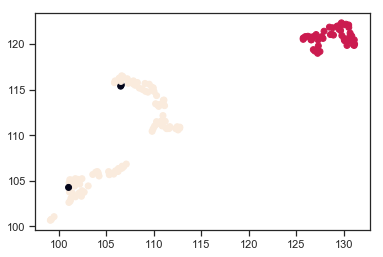

In [27]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_db)
plt.show()

<h3>Spectral Clustering</h3>

<ol>
	<li>Butuh matrix similarity S = S(xi,xj)</li>
	<li>S menjadi Graph tidak berarah</li>
	<li>Karena baris=kolom dan simetris ==&gt; positive definite</li>
	<li>Karena positive definite ==&gt; eigenvalue real</li>
	<li>Eigenvalue dari matrix ini == Spectral Teory :&nbsp;https://en.wikipedia.org/wiki/Spectral_graph_theory&nbsp;</li>
	<li>Maknanya adalah seperti &quot;centrality analysis&quot; di Social media Analytic, yaitu:<br />
	membentuk cluster graph sedemikian sehingga di suatu cluster tertentu weight (konektivitas)-nya paling besar.</li>
</ol>

<p><img alt="" src="images/5_Spectral_graph.png" style="height:134px; width:407px" /></p>

<p>&nbsp;</p>

<p><u><strong>referensi</strong></u>:&nbsp;Ng, A. Y., Jordan, M. I., &amp; Weiss, Y. (2002). On spectral clustering: Analysis and an algorithm. In&nbsp;<em>Advances in neural information processing systems</em>&nbsp;(pp. 849-856).</p>

<h3>&nbsp;</h3>


* https://www.youtube.com/watch?v=zkgm0i77jQ8
* <video controls src="images/SpectralClustering.MP4" />

<p>Karenanya Spectral bisa mengelompokkan data yang tidak &quot;spherical&quot; (bulat seperti k-means)</p>

<p><img alt="" src="images/5_Spectral_kmeans.png" style="height:284px; width:671px" /></p>


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

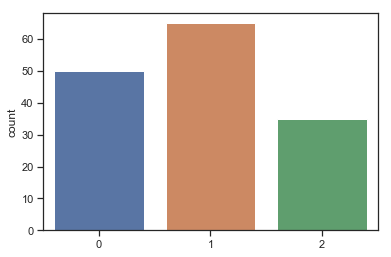

In [28]:
# Spectral : http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

spectral = cluster.SpectralClustering(n_clusters=3)
spectral.fit(X)
C_spec = spectral.labels_.astype(np.int)
sns.countplot(C_spec)
C_spec[:10]

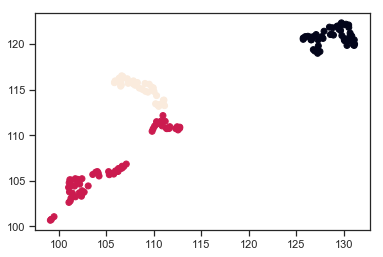

In [29]:
fig, ax = plt.subplots()
ax.scatter(X2D[:,0], X2D[:,1], c=C_spec)
plt.show()

<p><img alt="" src="images/5_clustering_benchmarks.png" style="height:500px; width:962px" /></p>


<p><img alt="" src="images/5_Cluster_yg_mana.png" style="height:400px; width:694px" /></p>


<h2 id="Computational-Complexity-Challenge-of-Clustering">Computational Complexity Challenge of Clustering</h2>

<p><img alt="" src="images/clustering_efficiency.png" style="width: 800px; height: 352px;" /></p>


## Pelajari Studi Kasus Berikut (Customer Segmentation):
## http://www.data-mania.com/blog/customer-profiling-and-segmentation-in-python/

# End of Module 

<hr />